In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import scipy.io as sio
import pandas as pd

In [3]:
path='/content/drive/MyDrive/INDIGO_MLR/Transformers/'
pathO=path+'Original/'
pathC=path+'Cross/'

In [4]:
mat_o=glob.glob(pathO+'*.mat')
mat_c=glob.glob(pathC+'*.mat')

In [5]:
def get_dataframe(mats):
  frame=pd.DataFrame(columns=['epoch','loss', 'accuracy', 'val_loss', 'val_accuracy', 'No'])
  time=[]
  for n,i in enumerate(mats):
    r=sio.loadmat(i)
    epoch=np.arange(np.shape(r['accuracy'])[1])+1
    No=np.ones(np.shape(r['accuracy'])[1])*n
    time.append(r['time'][0][0])

    fr=pd.DataFrame({'epoch':epoch,
                    'loss':r['loss'][0],
                    'accuracy':r['accuracy'][0],
                    'val_loss':r['val_loss'][0],
                    'val_accuracy':r['val_accuracy'][0],
                    'No': No})    
    frame=frame.append(fr, ignore_index=True)
    frame=frame.drop(frame.columns[:np.where(frame.columns=='epoch')[0][0]], axis=1)
  return frame, time

In [6]:
def plot_r(frame):
  sns.set_theme(style="darkgrid")
  plt.figure(figsize=(13,4))
  plt.subplot(1,2,1)
  sns.lineplot(x="epoch", y="accuracy", data=frame)
  sns.lineplot(x="epoch", y="val_accuracy", data=frame)
  plt.subplot(1,2,2)
  sns.lineplot(x="epoch", y="loss", data=frame)
  sns.lineplot(x="epoch", y="val_loss", data=frame)

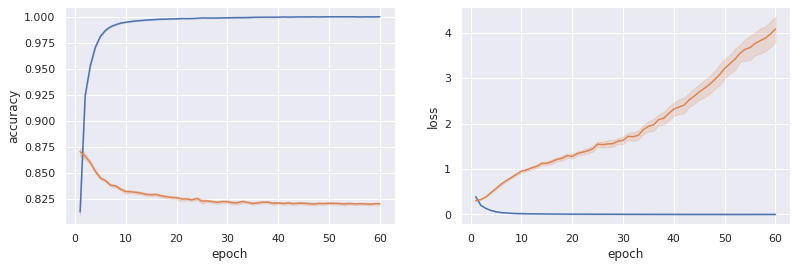

In [7]:
#Transformer original
fr,time1=get_dataframe(mat_o)
plot_r(fr)

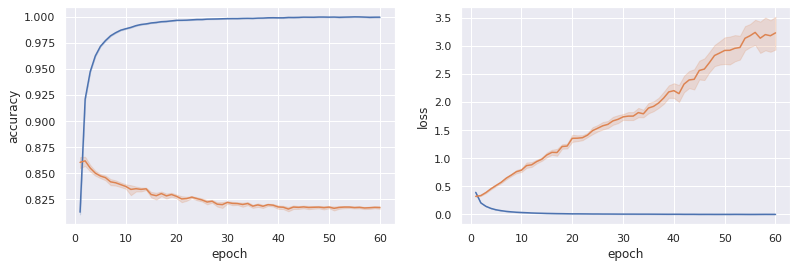

In [8]:
#Transformer cruzado
fr,time2=get_dataframe(mat_c)
plot_r(fr)

(0.0, 24.958325616916017)

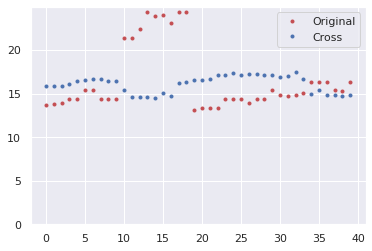

In [12]:
plt.plot(np.array(time1)/60, '.r')
plt.plot(np.array(time2)/60, '.')
plt.legend(['Original', 'Cross'])
plt.ylim((0))